### Mini_Batch_kmeans

##### Default batchsize = 100

In [1]:
import numpy as np
from sklearn.metrics import pairwise_distances_argmin
from sklearn import datasets
from sklearn.datasets import make_blobs
from time import time
import matplotlib.pyplot as plt

# n_samples = 1500
# X, y = datasets.make_blobs(n_samples = n_samples,centers = 4, cluster_std = 0.6,random_state = 42)

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train,y_test = train_test_split(X,y_true,test_size=0.3, shuffle=True, random_state=42)

# figure = plt.figure(figsize=(5, 5))
# ax = plt.axes()  #get the instance of axes from plt

# ax.grid()
# ax.scatter(X[:, 0], X[:, 1], c=y)

In [2]:
import pandas as pd
df = pd.read_csv("Country.csv")

print('Dataset information:\n')
df.info()
print('\nDataset head (first five rows):\n')
df.head()
df.drop(["country"], axis = 1, inplace=True)
# df.drop(["Gender"], axis = 1, inplace=True)

Dataset information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB

Dataset head (first five rows):



In [3]:
df.isnull()
df.isna().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [4]:
# import pandas as pd

# def clean_dataset(df):
#     assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
#     df.dropna(inplace=True)
#     indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
#     return df[indices_to_keep].astype(np.float64)

# test = clean_dataset(df)
# X= df.to_numpy()
# # print(test)
# print(X.shape)

In [5]:
X = df.iloc[:,0].to_numpy().reshape(-1,1)
print(np.min(X))

2.6


In [6]:
# X = df.to_numpy().astype('float')
# print(X)
# X = X[:,0].reshape(-1,1)
# print(X)
# print(X.dtype)
# # print(X)
print(np.any(np.isnan(X)))
print(np.isfinite(X))
# print(X)
mask = np.isfinite(X)
print(mask)

False
[[ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ T

In [7]:
class Mini_KMeans:
    def __init__(self, k, replacement=True, batch_size=10, max_iter=100):
        self.k = k
        self.replacement=replacement
        self.batch_size = batch_size
        self.max_iter = max_iter
    
    def fit(self, X):
        m, n = X.shape
        #1. randomly choose k clusters from X
        rng = np.random.RandomState(99)
        i = rng.permutation(m)[:self.k] # number of clusters
        self.centers = X[i]

        #having max iter makes sure it will stop eventually
        for ix in np.arange(self.max_iter):
            random = rng.randint(m)
            X_batch = X[random:random+self.batch_size]

            #2. assign labels based on closest center
#             print("centers\n",self.centers)
            labels = pairwise_distances_argmin(X_batch, self.centers)

            #3. find new centers
            new_centers = []
            for i in range(self.k):
                if np.isnan(X_batch[labels == i].mean(axis=0)[0]):
                    mean_i = np.array([0])
                else:
                    mean_i = X_batch[labels == i].mean(axis=0)
                new_centers.append(mean_i)

            #convert list to np.array; you can actually combine #3
            #with np.array in one sentence 
            new_centers = np.array(new_centers)

            #4 stopping criteria - if centers do not 
            #change anymore, we stop!
            #make sure to add rtol or atol since mini-batch does not converge
#             print("all close:\n  self.centers\n",self.centers,"\n  new center\n", new_centers)
            if(np.allclose(self.centers, new_centers, rtol=0.2)):
                break
            else:
                self.centers = new_centers

        print(f"Done in {ix} iterations")

        #compute total within-variation score
        total_with_variation_score = 0
        labels = pairwise_distances_argmin(X, self.centers) #<---Note I use X here.  Why?
        for i in range(self.k):
            cluster_mean = X[labels==i].mean(axis=0)
            total_with_variation_score += ((X[labels==i] - cluster_mean)** 2).sum()

        print("Total with variation score: ", total_with_variation_score)
        self.distortion = total_with_variation_score

    def predict(self, X):
        return pairwise_distances_argmin(X, self.centers)

In [8]:
#main code
distortion = []
for k in range(2,7):
    print(f"====== k = {k}")
    start = time()
    model = Mini_KMeans(k)
    model.fit(X)
    distortion.append(model.distortion)
    preds = model.predict(X)
    print(f"Fit and predict time {time() - start}")

====== k = 2
Done in 3 iterations
Total with variation score:  67827.58092531876
Fit and predict time 0.01007390022277832
====== k = 3
Done in 47 iterations
Total with variation score:  58687.13785317372
Fit and predict time 0.04229283332824707
====== k = 4
Done in 68 iterations
Total with variation score:  85885.13084149545
Fit and predict time 0.056298017501831055
====== k = 5
Done in 68 iterations
Total with variation score:  85885.13084149545
Fit and predict time 0.06117987632751465
====== k = 6


<ipython-input-7-e8333b0e7c83>:27: RuntimeWarning: Mean of empty slice.
  if np.isnan(X_batch[labels == i].mean(axis=0)[0]):
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
<ipython-input-7-e8333b0e7c83>:27: RuntimeWarning: Mean of empty slice.
  if np.isnan(X_batch[labels == i].mean(axis=0)[0]):
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
<ipython-input-7-e8333b0e7c83>:27: RuntimeWarning: Mean of empty slice.
  if np.isnan(X_batch[labels == i].mean(axis=0)[0]):
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
<ipython-input-7-e8333b0e7c83>:27: RuntimeWarning: Mean of empty slice.
  if np.isnan(X_batch[labels == i].mean(axis=0)[0]):
/opt/conda/lib/python3.8/site-packages/numpy/core/_metho

Done in 68 iterations
Total with variation score:  85885.13084149545
Fit and predict time 0.10093402862548828


<ipython-input-7-e8333b0e7c83>:27: RuntimeWarning: Mean of empty slice.
  if np.isnan(X_batch[labels == i].mean(axis=0)[0]):
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
<ipython-input-7-e8333b0e7c83>:27: RuntimeWarning: Mean of empty slice.
  if np.isnan(X_batch[labels == i].mean(axis=0)[0]):
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
<ipython-input-7-e8333b0e7c83>:27: RuntimeWarning: Mean of empty slice.
  if np.isnan(X_batch[labels == i].mean(axis=0)[0]):
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
<ipython-input-7-e8333b0e7c83>:27: RuntimeWarning: Mean of empty slice.
  if np.isnan(X_batch[labels == i].mean(axis=0)[0]):
/opt/conda/lib/python3.8/site-packages/numpy/core/_metho

[67827.58092531876, 58687.13785317372, 85885.13084149545, 85885.13084149545, 85885.13084149545]


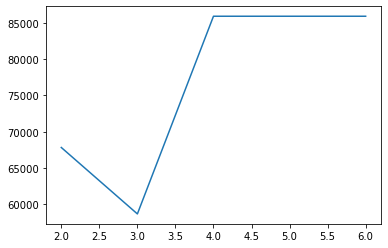

In [9]:
k = np.arange(2,7)
print(distortion)
plt.plot(k,distortion)

In [14]:
# select k
k = 3
model = Mini_KMeans(k)
model.fit(X)
preds = model.predict(X)

Done in 47 iterations
Total with variation score:  58687.13785317372


<ipython-input-7-e8333b0e7c83>:27: RuntimeWarning: Mean of empty slice.
  if np.isnan(X_batch[labels == i].mean(axis=0)[0]):
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
<ipython-input-7-e8333b0e7c83>:27: RuntimeWarning: Mean of empty slice.
  if np.isnan(X_batch[labels == i].mean(axis=0)[0]):
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
<ipython-input-7-e8333b0e7c83>:27: RuntimeWarning: Mean of empty slice.
  if np.isnan(X_batch[labels == i].mean(axis=0)[0]):
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
<ipython-input-7-e8333b0e7c83>:27: RuntimeWarning: Mean of empty slice.
  if np.isnan(X_batch[labels == i].mean(axis=0)[0]):
/opt/conda/lib/python3.8/site-packages/numpy/core/_metho

In [11]:
# print(preds)
# print(y_test)

In [16]:
# from sklearn.metrics import classification_report
# print('======= classification report =======')
# print(classification_report(y_test, preds))

In [13]:
np.nan == np.nan

False